In [19]:
import numpy as np
import pandas as pd

In [20]:
# a. Import the given “Salary_Data.csv”
df = pd.read_csv('C:\\Users\\Rams\Downloads\\datasets\\Salary_Data.csv')

In [21]:
X = df.iloc[:, :-1].values   #excluding last column i.e., years of experience column
Y = df.iloc[:, 1].values     #only salary column

In [22]:
# b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [23]:
# c. Train and predict the model.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_Pred = regressor.predict(X_test)
Y_Pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [24]:
# d. Calculate the mean_squared error
Serror = (Y_Pred - Y_test) ** 2
Sum_Serror = np.sum(Serror)
mean_squared_error = Sum_Serror / Y_test.size
mean_squared_error

21026037.329511296

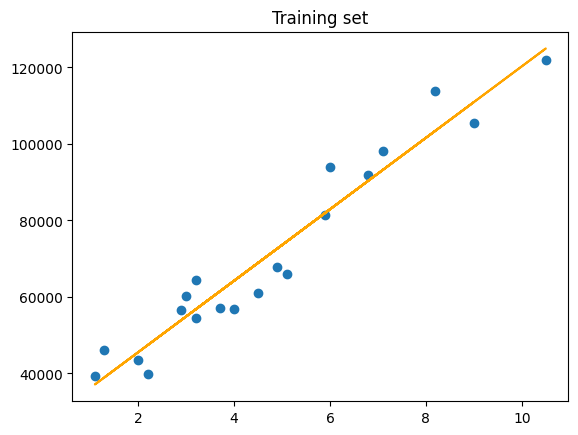

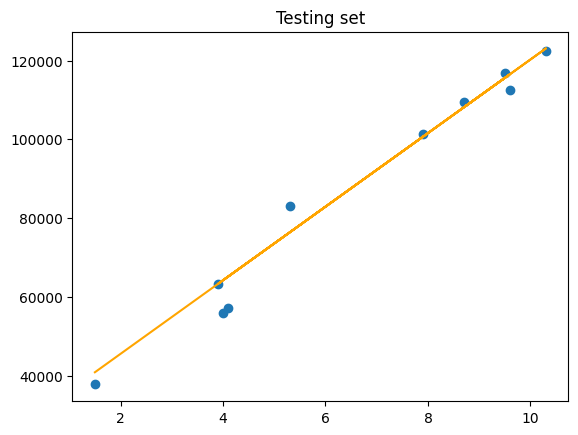

In [25]:
# e. Visualize both train and test data using scatter plot.
import matplotlib.pyplot as plt
# Training Data set
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color='orange')
plt.title('Training set')
plt.show()

# Testing Data set
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.predict(X_test), color='orange')
plt.title('Testing set')
plt.show()

In [26]:
# 2. Apply K means clustering in the dataset provided:

k_mean = pd.read_csv('C:\\Users\\Rams\Downloads\\datasets\\K-Mean_Dataset.csv')

In [27]:
k_mean.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [28]:
# Remove any null values by the mean.

mean1=k_mean['CREDIT_LIMIT'].mean()
mean2=k_mean['MINIMUM_PAYMENTS'].mean()
k_mean['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)
k_mean['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)

In [29]:
k_mean.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [13]:
x = k_mean.iloc[:,1:]            

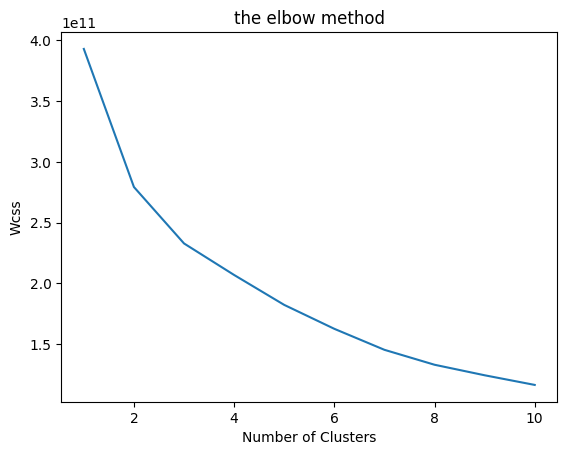

In [30]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


In [32]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the K in Kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)


0.46675588595465034


In [33]:
# feature scaling using standard scaler

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

In [34]:
#  Calculate the silhouette score for the above clustering 

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

0.25036547358653477


In [ ]:
The Silhouette score did not improve after feature scaling using for K-Means
